# Question

Use the expected value of the discounted payoff under the risk-neutral density ${\mathbb{Q}}$:

$$V(S,t) = e^{-r.(T-t)}.\mathbb{E}^{\mathbb{Q}}[\textbf{Payoff}(S_T)]$$

for the appropriate form of payoff, to consider **Asian** and **Lookback** options.

Use the **Euler-Maruyama** scheme for initially simulating the underlying stock price. As an initial example you may use the following set of sample data:

Today's stock price $S_0 = 100$

Strike $E = 100$

Time to expiry $(T - t) = 1 year$

Volatility $\sigma = 20$%

Constant risk-free interest rate $r = 5$%

Then vary the data to see the affect on the option price.

# Solution

We'll simulate the stock price at maturity $S_T$. Based on the Monte Carlo Simulation Python Labs, we're going to simulate the stock price followinh Black-Scholes-Merton under risk neutrality, geometric Brownian motion with a stochastic differential equation (SDE), given as:

$$dS_t = rS_t dt + \sigma S_t dZ_t$$

where $S_t$ is the price of the underlying at time $t$, $\sigma$ is constant volatility, $r$ is the constant risk-free interest rate and $Z$ is the Brownian motion.

Applying Euler-Maruyama discretization of SDE, we get:

$$S_t = S_{t - \Delta t} exp^{((r - \frac{1}{2}{\sigma}^2)\Delta t + \sigma \sqrt{\Delta t} z)}$$

The variable $z$ is a standard normally distributed random variable, $0 < \Delta t < T$, time interval. It also holds $0 < t \leq T$ with $T$ the final time horizon.

## Install and Import required libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
from numpy import *
from tabulate import tabulate
import matplotlib.pyplot as plt
from src.exotic_options import ExoticOptions
plt.style.use('seaborn-whitegrid')

## Simulating the Stock Prices Path

In [2]:
## Today's stock price
So = 100

## Strike
E = 100

## Time to expiry (T - t) in years
T = 1

## Volatility
vol = 0.2

## Constant risk-free interest rate - mu
r = 0.05

## Number of time steps
t = 252

## Number of simulations
sims = 100

## If using discrete's, the averages period
period = 20

## Index example
idx = 0

eo = ExoticOptions

In [3]:
# Stock price path
S = eo.monte_carlo_simulation(So, r, vol, T, t, sims)
sp_path = pd.DataFrame(S)

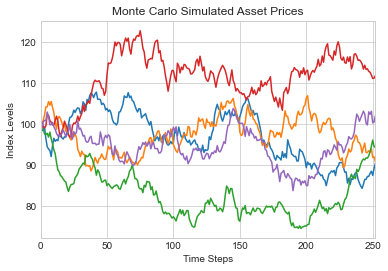

In [4]:
# Plot simulated price paths
for index in range(0, 5, 1):
    plt.plot(sp_path[index])
    plt.grid(True)
    plt.xlabel('Time Steps')
    plt.xlim(0,252)
    plt.ylabel('Index Levels')
    plt.title('Monte Carlo Simulated Asset Prices');

### Asian options

_"Asian options give the holder a payoff that depends on the average price of the underlying over some prescribed period. This average of the underlying can significally reduce the price of an Asian option compared with a similar vanilla contract."_

#### Types of averaging and payoff

Knowing that the Asian options payoff depends on the average of the underlying stock price, we can average discretely or continuously, in it's arithmetic or geometric form.

_"As well as calls, puts etc. there is also the classification of **strike** and **rate**."_

Assuming $A$ the average of the stock price, the payoffs are given by:

- **Average strike call**

$$max(S - A, 0)$$

- **Average strike put**

$$max(A - S, 0)$$

- **Average rate call**

$$max(A - E, 0)$$

- **Average rate put**

$$max(E - A, 0)$$

where $S$ is the stock price and $E$ the strike.

### Calculating the averages

At first, we'll calculate both continuous arithmetic and geometric averages.

#### Calculating the Arithmetic Averages

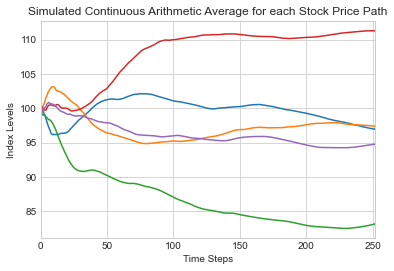

In [5]:
# Continuous Arithmetic Average
AC = {}

AC = eo.continuous_arithmetic_avrg(AC, sp_path)
    
caa = pd.DataFrame(AC)

for index in range(0, 5, 1):
    plt.plot(caa[index])
    plt.grid(True)
    plt.xlabel('Time Steps')
    plt.xlim(0,252)
    plt.ylabel('Index Levels')
    plt.title('Simulated Continuous Arithmetic Average for each Stock Price Path');

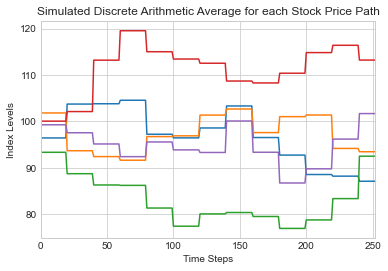

In [6]:
# Discrete Arithmetic Average
AD = {}

AD = eo.discrete_arithmetic_avrg(AD, sp_path, period)

daa = pd.DataFrame(AD)

for index in range(0, 5, 1):
    plt.plot(daa[index])
    plt.grid(True)
    plt.xlabel('Time Steps')
    plt.xlim(0,252)
    plt.ylabel('Index Levels')
    plt.title('Simulated Discrete Arithmetic Average for each Stock Price Path');

#### Calculating the Geometric Averages

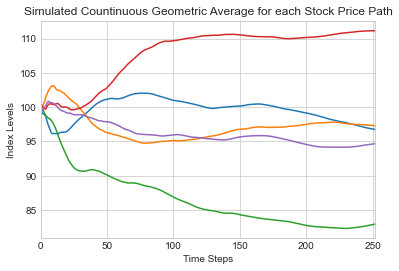

In [7]:
# Countinuous Geometric Average
GC = {}

GC = eo.continuous_geometric_avrg(GC, sp_path)
    
cga = pd.DataFrame(GC)

for index in range(0, 5, 1):
    plt.plot(cga[index])
    plt.grid(True)
    plt.xlabel('Time Steps')
    plt.xlim(0,252)
    plt.ylabel('Index Levels')
    plt.title('Simulated Countinuous Geometric Average for each Stock Price Path');

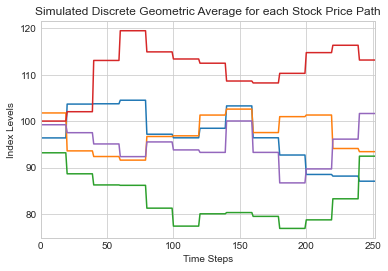

In [8]:
# Discrete Geometric Average
GD = {}

GD = eo.discrete_geometric_avrg(GD, sp_path, period)

dga = pd.DataFrame(GD)

for index in range(0, 5, 1):
    plt.plot(dga[index])
    plt.grid(True)
    plt.xlabel('Time Steps')
    plt.xlim(0,252)
    plt.ylabel('Index Levels')
    plt.title('Simulated Discrete Geometric Average for each Stock Price Path');

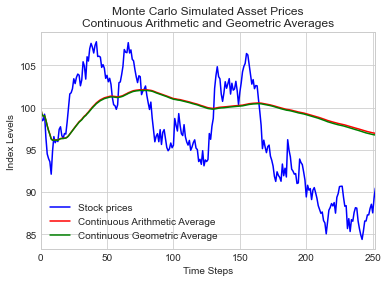

In [9]:
# Plot example - Continuous
plt.plot(sp_path[idx], color = 'b', label = 'Stock prices')
plt.plot(caa[idx], color = 'r', label = 'Continuous Arithmetic Average')
plt.plot(cga[idx], color = 'g', label = 'Continuous Geometric Average')
plt.grid(True)
plt.xlabel('Time Steps')
plt.xlim(0,252)
plt.ylabel('Index Levels')
plt.title('Monte Carlo Simulated Asset Prices\nContinuous Arithmetic and Geometric Averages')
plt.legend();

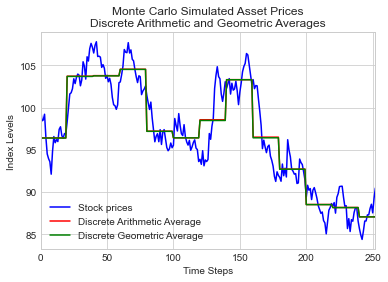

In [10]:
# Plot example - Discrete
plt.plot(sp_path[idx], color = 'b', label = 'Stock prices')
plt.plot(daa[idx], color = 'r', label = 'Discrete Arithmetic Average')
plt.plot(dga[idx], color = 'g', label = 'Discrete Geometric Average')
plt.grid(True)
plt.xlabel('Time Steps')
plt.xlim(0,252)
plt.ylabel('Index Levels')
plt.title('Monte Carlo Simulated Asset Prices\nDiscrete Arithmetic and Geometric Averages')
plt.legend();

### Asian calls

#### Continuous averages

In [11]:
# Continuous Arithmetic Average Strike Call
caasc = eo.payoff_mean(r, T, sp_path, caa)

# Continuous Geometric Average Strike Call
cgasc = eo.payoff_mean(r, T, sp_path, cga)

# Continuous Arithmetic Average Rate Call
caarc = eo.payoff_mean(r, T, caa, E)

# Continuous Geometric Average Rate Call
cgarc = eo.payoff_mean(r, T, cga, E)

# Print the values
print(f'Continuous Arithmetic Average Strike Call Value: {caasc:.4f}\n')
print(f'Continuous Arithmetic Average Rate Call Value: {caarc:.4f}\n\n')
print(f'Continuous Geometric Average Strike Call Value: {cgasc:.4f}\n')
print(f'Continuous Geometric Average Rate Call Value: {cgarc:.4f}\n')

Continuous Arithmetic Average Strike Call Value: 3.4717

Continuous Arithmetic Average Rate Call Value: 3.1783


Continuous Geometric Average Strike Call Value: 3.5646

Continuous Geometric Average Rate Call Value: 3.0863



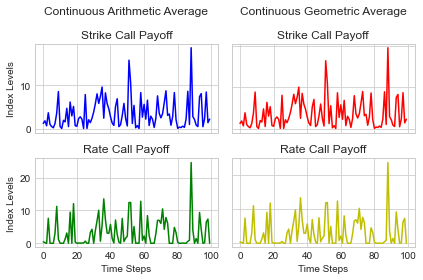

In [12]:
## PLOT EXAMPLE

# Continuous Arithmetic Average Strike Call
caascex = eo.payoff(r, T, sp_path, caa)

# Continuous Geometric Average Strike Call
cgascex = eo.payoff(r, T, sp_path, cga)

# Continuous Arithmetic Average Rate Call
caarcex = eo.payoff(r, T, caa, E)

# Continuous Geometric Average Rate Call
cgarcex = eo.payoff(r, T, cga, E)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(caascex, color = 'b')
axs[0, 0].set_title('Continuous Arithmetic Average\n\nStrike Call Payoff')
axs[0, 1].plot(cgascex, color = 'r')
axs[0, 1].set_title('Continuous Geometric Average\n\nStrike Call Payoff')
axs[1, 0].plot(caarcex, color = 'g')
axs[1, 0].set_title('Rate Call Payoff')
axs[1, 1].plot(cgarcex, color = 'y')
axs[1, 1].set_title('Rate Call Payoff')

for ax in axs.flat:
    ax.set(xlabel='Time Steps', ylabel='Index Levels')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.tight_layout()

#### Discrete averages

In [13]:
# Discrete Arithmetic Average Strike Call
daasc = eo.payoff_mean(r, T, sp_path, daa)

# Discrete Geometric Average Strike Call
dgasc = eo.payoff_mean(r, T, sp_path, dga)

# Discrete Arithmetic Average Rate Call
daarc = eo.payoff_mean(r, T, daa, E)

# Discrete Geometric Average Rate Call
dgarc = eo.payoff_mean(r, T, dga, E)

# Print the values
print(f'Discrete Arithmetic Average Strike Call Value: {daasc:.4f}\n')
print(f'Discrete Arithmetic Average Rate Call Value: {daarc:.4f}\n\n')
print(f'Discrete Geometric Average Strike Call Value: {dgasc:.4f}\n')
print(f'Discrete Geometric Average Rate Call Value: {dgarc:.4f}\n')

Discrete Arithmetic Average Strike Call Value: 0.8561

Discrete Arithmetic Average Rate Call Value: 5.7719


Discrete Geometric Average Strike Call Value: 0.8682

Discrete Geometric Average Rate Call Value: 5.7583



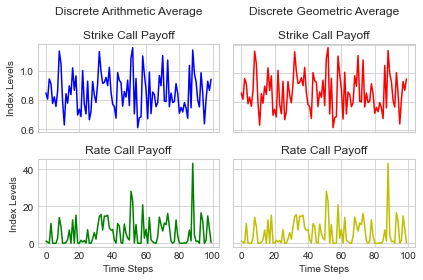

In [14]:
## PLOT EXAMPLE

# Discrete Arithmetic Average Strike Call
daascex = eo.payoff(r, T, sp_path, daa)

# Discrete Geometric Average Strike Call
dgascex = eo.payoff(r, T, sp_path, dga)

# Discrete Arithmetic Average Rate Call
daarcex = eo.payoff(r, T, daa, E)

# Discrete Geometric Average Rate Call
dgarcex = eo.payoff(r, T, dga, E)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(daascex, color = 'b')
axs[0, 0].set_title('Discrete Arithmetic Average\n\nStrike Call Payoff')
axs[0, 1].plot(dgascex, color = 'r')
axs[0, 1].set_title('Discrete Geometric Average\n\nStrike Call Payoff')
axs[1, 0].plot(daarcex, color = 'g')
axs[1, 0].set_title('Rate Call Payoff')
axs[1, 1].plot(dgarcex, color = 'y')
axs[1, 1].set_title('Rate Call Payoff')

for ax in axs.flat:
    ax.set(xlabel='Time Steps', ylabel='Index Levels')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.tight_layout()

### Asian puts

#### Continuous averages

In [15]:
# Continuous Arithmetic average Strike Put
caasp = eo.payoff_mean(r, T, caa, sp_path)

# Continuous Geometric average Strike Put
cgasp = eo.payoff_mean(r, T, cga, sp_path)

# Continuous Arithmetic average Rate Put
caarp = eo.payoff_mean(r, T, E, caa)

# Continuous Geometric average Rate Put
cgarp = eo.payoff_mean(r, T, E, cga)

# Print the values
print(f'Continuous Arithmetic Average Strike Put Value: {caasp:.4f}\n')
print(f'Continuous Arithmetic Average Rate Put Value: {caarp:.4f}\n\n')
print(f'Continuous Geometric Average Strike Put Value: {cgasp:.4f}\n')
print(f'Continuous Geometric Average Rate Put Value: {cgarp:.4f}\n')

Continuous Arithmetic Average Strike Put Value: 2.1371

Continuous Arithmetic Average Rate Put Value: 2.7013


Continuous Geometric Average Strike Put Value: 2.0819

Continuous Geometric Average Rate Put Value: 2.7574



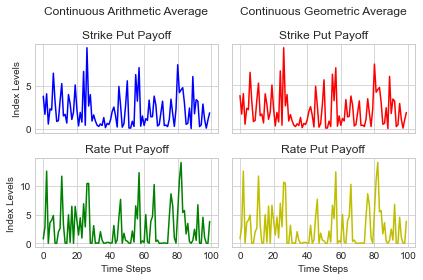

In [16]:
## PLOT EXAMPLE

# Continuous Arithmetic average Strike Put
caaspex = eo.payoff(r, T, caa, sp_path)

# Continuous Geometric average Strike Put
cgaspex = eo.payoff(r, T, cga, sp_path)

# Continuous Arithmetic average Rate Put
caarpex = eo.payoff(r, T, E, caa)

# Continuous Geometric average Rate Put
cgarpex = eo.payoff(r, T, E, cga)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(caaspex, color = 'b')
axs[0, 0].set_title('Continuous Arithmetic Average\n\nStrike Put Payoff')
axs[0, 1].plot(cgaspex, color = 'r')
axs[0, 1].set_title('Continuous Geometric Average\n\nStrike Put Payoff')
axs[1, 0].plot(caarpex, color = 'g')
axs[1, 0].set_title('Rate Put Payoff')
axs[1, 1].plot(cgarpex, color = 'y')
axs[1, 1].set_title('Rate Put Payoff')

for ax in axs.flat:
    ax.set(xlabel='Time Steps', ylabel='Index Levels')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.tight_layout()

#### Discrete averages

In [17]:
# Discrete Arithmetic average Strike Put
daasp = eo.payoff_mean(r, T, daa, sp_path)

# Discrete Geometric average Strike Put
dgasp = eo.payoff_mean(r, T, dga, sp_path)

# Discrete Arithmetic average Rate Put
daarp = eo.payoff_mean(r, T, E, daa)

# Discrete Geometric average Rate Put
dgarp = eo.payoff_mean(r, T, E, dga)

# Print the values
print(f'Discrete Arithmetic Average Strike Put Value: {daasp:.4f}\n')
print(f'Discrete Arithmetic Average Rate Put Value: {daarp:.4f}\n\n')
print(f'Discrete Geometric Average Strike Put Value: {dgasp:.4f}\n')
print(f'Discrete Geometric Average Rate Put Value: {dgarp:.4f}\n')

Discrete Arithmetic Average Strike Put Value: 0.8561

Discrete Arithmetic Average Rate Put Value: 3.9604


Discrete Geometric Average Strike Put Value: 0.8435

Discrete Geometric Average Rate Put Value: 3.9715



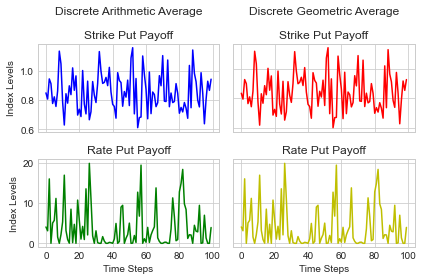

In [18]:
## PLOT EXAMPLE

# Discrete Arithmetic average Strike Put
daaspex = eo.payoff(r, T, daa, sp_path)

# Discrete Geometric average Strike Put
dgaspex = eo.payoff(r, T, dga, sp_path)

# Discrete Arithmetic average Rate Put
daarpex = eo.payoff(r, T, E, daa)

# Discrete Geometric average Rate Put
dgarpex = eo.payoff(r, T, E, dga)

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(daaspex, color = 'b')
axs[0, 0].set_title('Discrete Arithmetic Average\n\nStrike Put Payoff')
axs[0, 1].plot(dgaspex, color = 'r')
axs[0, 1].set_title('Discrete Geometric Average\n\nStrike Put Payoff')
axs[1, 0].plot(daarpex, color = 'g')
axs[1, 0].set_title('Rate Put Payoff')
axs[1, 1].plot(dgarpex, color = 'y')
axs[1, 1].set_title('Rate Put Payoff')

for ax in axs.flat:
    ax.set(xlabel='Time Steps', ylabel='Index Levels')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.tight_layout()

### Tabulated values - Asian Option

In [19]:
print('Expected Asian Option Payoffs based on different modes of averaging:')

print("\n\nStrike Call")

print(tabulate([["Continuous Arithmetic Average", caasc], 
                ["Continuous Geometric Average", cgasc], 
                ["Discrete Arithmetic Average", daasc], 
                ["Discrete Geometric Average", dgasc]], 
                floatfmt=".4f", tablefmt="fancy_grid"))

print("\n\nRate Call")

print(tabulate([["Continuous Arithmetic Average", caarc], 
                ["Continuous Geometric Average", cgarc], 
                ["Discrete Arithmetic Average", daarc],
                ["Discrete Geometric Average", dgarc]], 
                floatfmt=".4f", tablefmt="fancy_grid"))

print("\n\nStrike Put")

print(tabulate([["Continuous Arithmetic Average", caasp], 
                ["Continuous Geometric Average", cgasp], 
                ["Discrete Arithmetic Average", daasp], 
                ["Discrete Geometric Average", dgasp]], 
                floatfmt=".4f", tablefmt="fancy_grid"))

print("\n\nRate Put")

print(tabulate([["Continuous Arithmetic Average", caarp], 
                ["Continuous Geometric Average", cgarp],
                ["Discrete Arithmetic Average", daarp],
                ["Discrete Geometric Average", dgarp]], 
                floatfmt=".4f", tablefmt="fancy_grid"))

Expected Asian Option Payoffs based on different modes of averaging:


Strike Call
╒═══════════════════════════════╤════════╕
│ Continuous Arithmetic Average │ 3.4717 │
├───────────────────────────────┼────────┤
│ Continuous Geometric Average  │ 3.5646 │
├───────────────────────────────┼────────┤
│ Discrete Arithmetic Average   │ 0.8561 │
├───────────────────────────────┼────────┤
│ Discrete Geometric Average    │ 0.8682 │
╘═══════════════════════════════╧════════╛


Rate Call
╒═══════════════════════════════╤════════╕
│ Continuous Arithmetic Average │ 3.1783 │
├───────────────────────────────┼────────┤
│ Continuous Geometric Average  │ 3.0863 │
├───────────────────────────────┼────────┤
│ Discrete Arithmetic Average   │ 5.7719 │
├───────────────────────────────┼────────┤
│ Discrete Geometric Average    │ 5.7583 │
╘═══════════════════════════════╧════════╛


Strike Put
╒═══════════════════════════════╤════════╕
│ Continuous Arithmetic Average │ 2.1371 │
├───────────────────────────────

### Lookback options

_"Lookback options is the one that pays off some function of the realized maximum and/or minimum of the underlying asset over some prescribed period."_

#### Types of payoff

The maximum can be sampled continuously or discretely.

_"For the basic lookback contracts, the payoff comes in two varieties, like the Asian option. These are the rate and the strike option, also called the fixed strike and the floating strike respectively. These have payoffs that are the same as vanilla options except that in the strike option the vanilla exercise price is replaced by the maximum. In the rate option it is the asset value in the vanilla option that is replaced by the maximum."_

Assuming $M$ the maximum of the stock price, the payoffs are given by:

- **Lookback rate call**

$$max(M - E, 0)$$

- **Lookback rate put**

$$max(E - M, 0)$$

- **Lookback strike call**

$$max(S - M, 0)$$

- **Lookback strike put**

$$max(M - S, 0)$$

where $S$ is the stock price and $E$ the strike.

### Estipulating the maximum

Calculating the continuous and discrete maximum.

#### Continuous

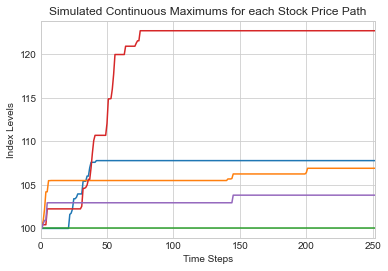

In [20]:
# Continuous Stock maximums
MC = {}

MC = eo.continuous_maximum(MC, sp_path)

c_max_stock = pd.DataFrame(MC)

for index in range(0, 5, 1):
    plt.plot(c_max_stock[index])
    plt.grid(True)
    plt.xlabel('Time Steps')
    plt.xlim(0,252)
    plt.ylabel('Index Levels')
    plt.title('Simulated Continuous Maximums for each Stock Price Path');

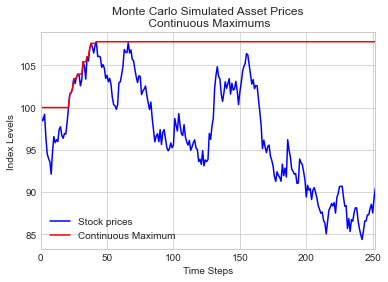

In [21]:
# Plot example
plt.plot(sp_path[idx], color = 'b', label = 'Stock prices')
plt.plot(c_max_stock[idx], color = 'r', label = 'Continuous Maximum')
plt.grid(True)
plt.xlabel('Time Steps')
plt.xlim(0,252)
plt.ylabel('Index Levels')
plt.title('Monte Carlo Simulated Asset Prices\n Continuous Maximums')
plt.legend();

#### Discrete

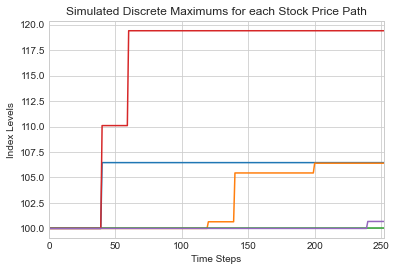

In [22]:
# Discrete Stock maximums
MD = {}

MD = eo.discrete_maximum(MD, sp_path, period)

d_max_stock = pd.DataFrame(MD)

for index in range(0, 5, 1):
    plt.plot(d_max_stock[index])
    plt.grid(True)
    plt.xlabel('Time Steps')
    plt.xlim(0,252)
    plt.ylabel('Index Levels')
    plt.title('Simulated Discrete Maximums for each Stock Price Path');

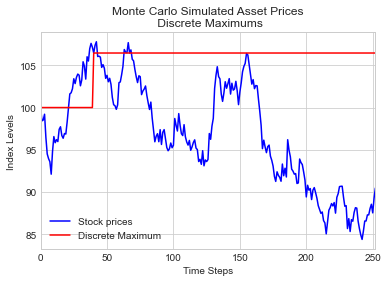

In [23]:
# Plot example
plt.plot(sp_path[idx], color = 'b', label = 'Stock prices')
plt.plot(d_max_stock[idx], color = 'r', label = 'Discrete Maximum')
plt.grid(True)
plt.xlabel('Time Steps')
plt.xlim(0,252)
plt.ylabel('Index Levels')
plt.title('Monte Carlo Simulated Asset Prices\n Discrete Maximums')
plt.legend();

### Lookback call

#### Continuous

In [24]:
# Lookback Strike Call
clsc = eo.payoff_mean(r, T, sp_path, c_max_stock)

# Lookback Rate Call
clrc = eo.payoff_mean(r, T, c_max_stock, E)

# Print the values
print(f'Continuous Lookback Strike Call Value: {clsc:.4f}\n')
print(f'Continuous Lookback Rate Call Value: {clrc:.4f}\n')

Continuous Lookback Strike Call Value: 0.0000

Continuous Lookback Rate Call Value: 10.1700



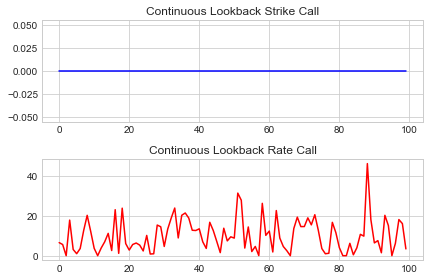

In [25]:
## PLOT EXAMPLE

# Lookback Strike Call
clscex = eo.payoff(r, T, sp_path, c_max_stock)

# Lookback Rate Call
clrcex = eo.payoff(r, T, c_max_stock, E)

fig, axs = plt.subplots(2, 1)
axs[0].plot(clscex, color = 'b')
axs[0].set_title('Continuous Lookback Strike Call')
axs[1].plot(clrcex, color = 'r')
axs[1].set_title('Continuous Lookback Rate Call')
fig.tight_layout()

#### Discrete

In [26]:
# Lookback Strike Call
dlsc = eo.payoff_mean(r, T, sp_path, d_max_stock)

# Lookback Rate Call
dlrc = eo.payoff_mean(r, T, d_max_stock, E)

# Print the values
print(f'Discrete Lookback Strike Call Value: {dlsc:.4f}\n')
print(f'Discrete Lookback Rate Call Value: {dlrc:.4f}\n')

Discrete Lookback Strike Call Value: 0.6187

Discrete Lookback Rate Call Value: 7.7458



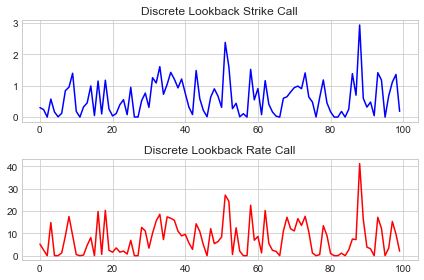

In [27]:
## PLOT EXAMPLE

# Lookback Strike Call
dlscex = eo.payoff(r, T, sp_path, d_max_stock)

# Lookback Rate Call
dlrcex = eo.payoff(r, T, d_max_stock, E)

fig, axs = plt.subplots(2, 1)
axs[0].plot(dlscex, color = 'b')
axs[0].set_title('Discrete Lookback Strike Call')
axs[1].plot(dlrcex, color = 'r')
axs[1].set_title('Discrete Lookback Rate Call')
fig.tight_layout()

### Lookback put

#### Continuous

In [28]:
# Lookback Strike Put
clsp = eo.payoff_mean(r, T, c_max_stock, sp_path)

# Lookback Rate Put
clrp = eo.payoff_mean(r, T, E, c_max_stock)

# Print the values
print(f'Continuous Lookback Strike Put Value: {clsp:.4f}\n')
print(f'Continuous Lookback Rate Put Value: {clrp:.4f}\n')

Continuous Lookback Strike Put Value: 8.3584

Continuous Lookback Rate Put Value: 0.0000



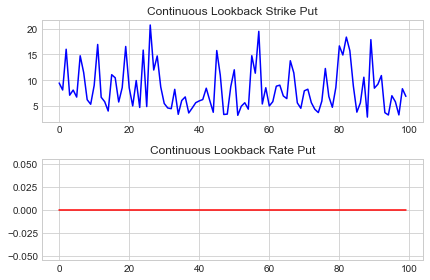

In [29]:
## PLOT EXAMPLE

# Lookback Strike Put
clspex = eo.payoff(r, T, c_max_stock, sp_path)
# Lookback Rate Put
clrpex = eo.payoff(r, T, E, c_max_stock)

fig, axs = plt.subplots(2, 1)
axs[0].plot(clspex, color = 'b')
axs[0].set_title('Continuous Lookback Strike Put')
axs[1].plot(clrpex, color = 'r')
axs[1].set_title('Continuous Lookback Rate Put')
fig.tight_layout()

#### Discrete

In [30]:
# Lookback Strike Put
dlsp = eo.payoff_mean(r, T, d_max_stock, sp_path)

# Lookback Rate Put
dlrp = eo.payoff_mean(r, T, E, d_max_stock)

# Print the values
print(f'Discrete Lookback Strike Put Value: {dlsp:.4f}\n')
print(f'Discrete Lookback Rate Put Value: {dlrp:.4f}\n')

Discrete Lookback Strike Put Value: 6.5530

Discrete Lookback Rate Put Value: 0.0000



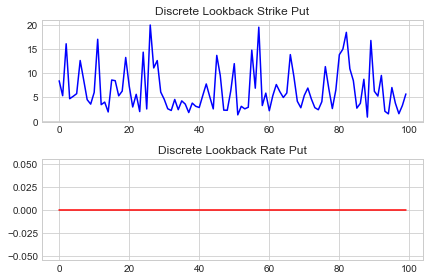

In [31]:
## PLOT EXAMPLE

# Lookback Strike Put
dlspex = eo.payoff(r, T, d_max_stock, sp_path)

# Lookback Rate Put
dlrpex = eo.payoff(r, T, E, d_max_stock)

fig, axs = plt.subplots(2, 1)
axs[0].plot(dlspex, color = 'b')
axs[0].set_title('Discrete Lookback Strike Put')
axs[1].plot(dlrpex, color = 'r')
axs[1].set_title('Discrete Lookback Rate Put')
fig.tight_layout()

### Tabulated values - Lookback Option

In [32]:
print('Expected Lookback Option Payoffs based on different modes of taking maximums:')

print("\n\nStrike Call")

print(tabulate([["Continuous Maximum", clsc], 
                ["Discrete Maximum", dlsc]], 
                floatfmt=".4f", tablefmt="fancy_grid"))

print("\n\nRate Call")

print(tabulate([["Continuous Maximum", clrc], 
                ["Discrete Maximum", dlrc]], 
                floatfmt=".4f", tablefmt="fancy_grid"))

print("\n\nStrike Put")

print(tabulate([["Continuous Maximum", clsp], 
                ["Discrete Maximum", dlsp]], 
                floatfmt=".4f", tablefmt="fancy_grid"))

print("\n\nRate Put")

print(tabulate([["Continuous Maximum", clrp], 
                ["Discrete Maximum", dlrp]], 
                floatfmt=".4f", tablefmt="fancy_grid"))

Expected Lookback Option Payoffs based on different modes of taking maximums:


Strike Call
╒════════════════════╤════════╕
│ Continuous Maximum │ 0.0000 │
├────────────────────┼────────┤
│ Discrete Maximum   │ 0.6187 │
╘════════════════════╧════════╛


Rate Call
╒════════════════════╤═════════╕
│ Continuous Maximum │ 10.1700 │
├────────────────────┼─────────┤
│ Discrete Maximum   │  7.7458 │
╘════════════════════╧═════════╛


Strike Put
╒════════════════════╤════════╕
│ Continuous Maximum │ 8.3584 │
├────────────────────┼────────┤
│ Discrete Maximum   │ 6.5530 │
╘════════════════════╧════════╛


Rate Put
╒════════════════════╤════════╕
│ Continuous Maximum │ 0.0000 │
├────────────────────┼────────┤
│ Discrete Maximum   │ 0.0000 │
╘════════════════════╧════════╛


# Final Discussion

Above we've seen all this notebook can do based on the problem as examples. Now, the code will be based on varying some data to see the results.

The computational time to calculate everything below is expensive. The averages calculations takes a little time to estimate everything, continously or discretely. As the varying Strike is not dependent on new simulations, it takes less time to conclude. But Volatility, Risk-free Interest Rate and Time-to-expiry are Monte Carlo Simulation's parameters, and every single iteration depends on a new simulation and a new average calculation. The less number of simulations we have, the less is the time to get results and less is the accuracy of the results (Central Limit Theorem). What is above the Final Discussion is the example of a 10 thousand simulations at Monte Carlo Method. But to have the varying data we'll use 100 simulations, even costing time to do it.

## All data needed

Some fixed variables were needed to have a clear visualization of varying data results:

Today's stock price $S_0 = 100$

Strike $E = 100$

Time to expiry $(T - t) = 1 year$

Volatility $\sigma = 20$%

Constant risk-free interest rate $r = 5$%

Time steps $t = 252$ days

Number of simulations $sims = 100$

Discrete averages pediod $period = 20$

Variables Strike, Volatility, Risk-free Interest Rate and Time-to-expiry were changed to see change affects on the options payoff results.

In [33]:
# STANDARD DATA
So = 100
E = 100
T = 1
vol = 0.2
r = 0.05
t = 252
sims = 100
period = 20

## Strike

The Strike will be changed from 10 to 300, using 10 as step.

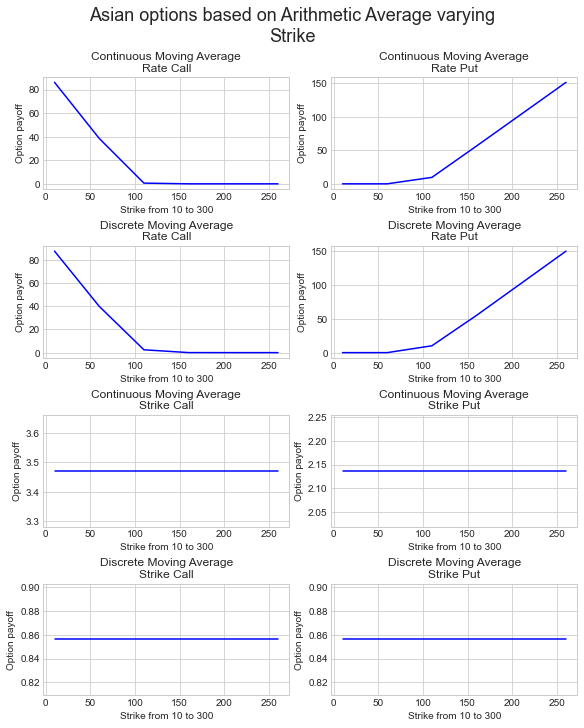

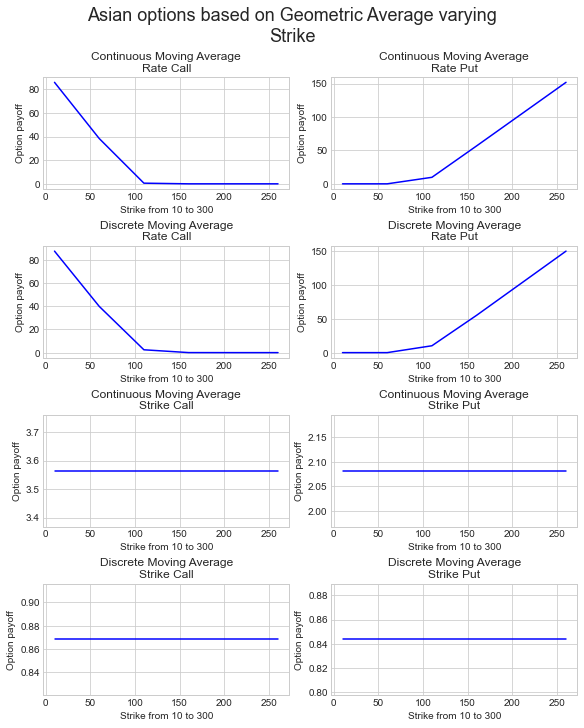

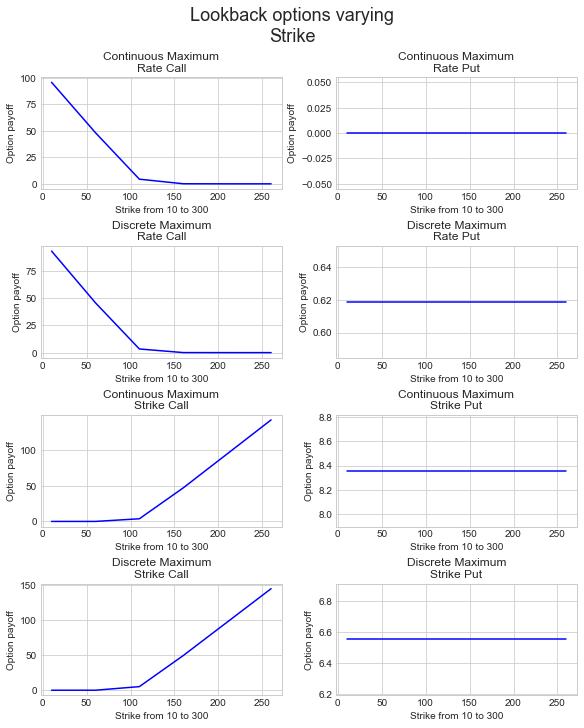

In [34]:
eo.varying_parameters(So, r, vol, T, t, sims, period, E, 'E', 10, 300, 50)

### Asian options

As it can be seen, for both arithmetic and geometric averages the Strike Call and Put don't make changes as the Strike varies, and it's payoffs can be approximately estimated:

**Arithmetic**
- Continuous average Strike Call: 3.50
- Discrete average Strike Call: 0.85
- Continuous average Strike Put: 2.15
- Discrete average Strike Put: 0.86

**Geometric average**
- Continuous average Strike Call: 3.60
- Discrete average Strike Call: 0.87
- Continuous average Strike Put: 2.09
- Discrete average Strike Put: 0.85

Other results show that as the Strike decreases the Call payoff increases. Similarly as the Strike value increases the Put values increases. All of this was expected, because we have a fixed initial Stock Price.

### Lookback options

Lookback Put don't make changes as the Strike varies, and it's payoffs can be approximately estimated:

- Continuous Maximum Strike Put: 0.00
- Discrete Maximum Strike Put: 0.62
- Continuous Maximum Rate Put: 8.26
- Discrete Maximum Rate Put: 6.60

Continuous Maximum Strike Put was obviously going to value 0, because the Maximum will never be less than the Stock Price. Changes related to Strike changes are:

- Continuous Maximum Strike Call: decrease of Strike price increase the option payoff.
- Discrete Maximum Strike Call: decrease of Strike price increase the option payoff.
- Continuous Maximum Rate Call: increase of Strike price increase the option payoff.
- Discrete Maximum Rate Call: increase of Strike price increase the option payoff.

## Volatility

The Volatility will be changed from 1% to 1000%, using 20% as step.

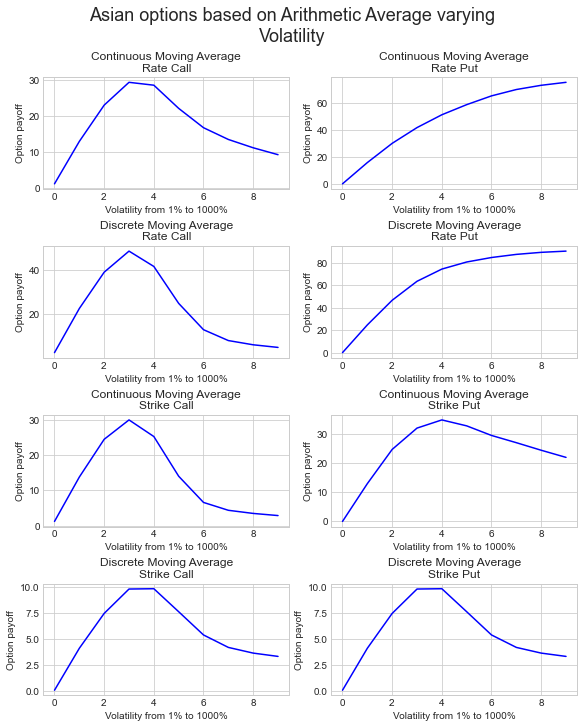

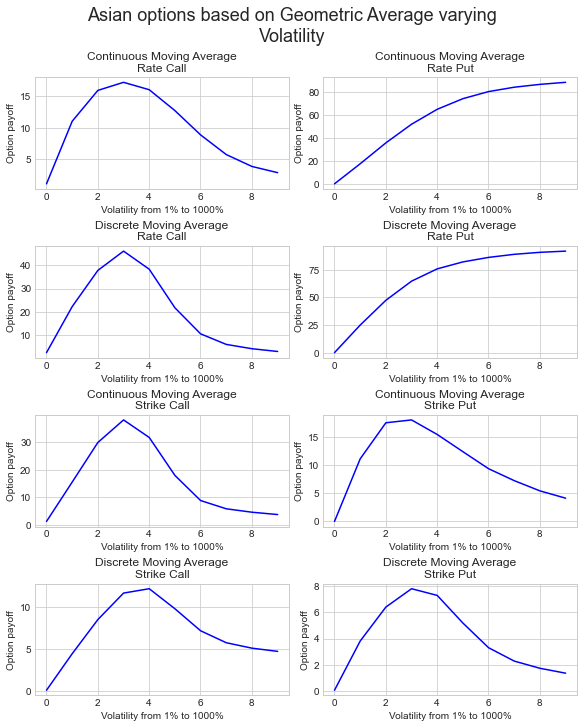

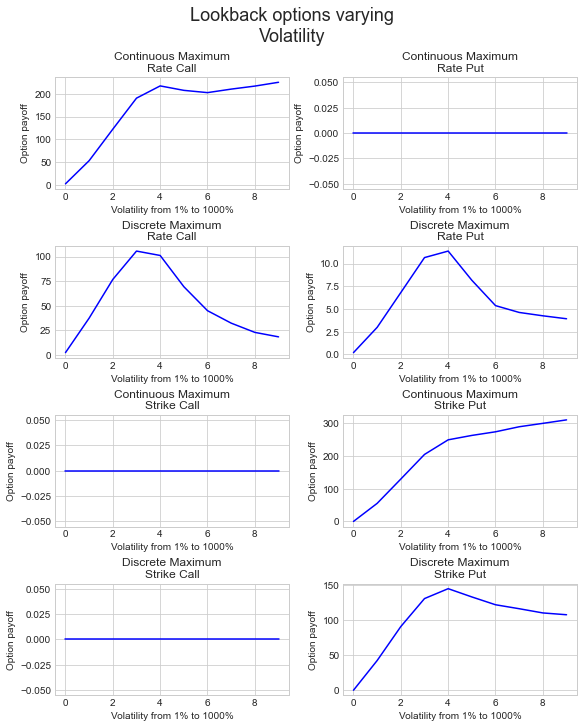

In [35]:
eo.varying_parameters(So, r, vol, T, t, sims, period, E, 'vol', 0.01, 10.00, 1)

Volatility was a very interesting parameter to work because of the graphs it resulted. Because of it's behavior I've chosen to extrapolate some simulations and take a very big change, from 1% to 1000% of volatility.

### Asian options

Arithmetic and geometric averages Continuous Moving Average Rate Put and Discrete Moving Average Rate Put has expected payoffs increased as the volatility increases. The others has peaks.

**Arithmetic**
- Continuous average Rate Call peak at approximately 350% volatility.
- Discrete average Rate Call peak at approximately 350% volatility.
- Continuous average Strike Call peak at approximately 350% volatility.
- Discrete average Strike Call peak at approximately 350% volatility.
- Continuous average Strike Put peak at approximately 400% volatility.
- Discrete average Strike Put peak at approximately 400% volatility.

**Geometric average**
- Continuous average Rate Call peak at approximately 350% volatility.
- Discrete average Rate Call peak at approximately 350% volatility.
- Continuous average Strike Call peak at approximately 350% volatility.
- Discrete average Strike Call peak at approximately 400% volatility.
- Continuous average Strike Put peak at approximately 200% volatility.
- Discrete average Strike Put peak at approximately 350% volatility.

### Lookback options

Volatility doesn't have affect on the option value (to this standard parameters) on Continuous Maximum Rate Put, Continuous Maximum Strike Call, Discrete Maximum Strike Call, and all the option expected payoffs are null.
We can see that both Discrete Maximum Rate Call, Discrete Maximum Strike Put and Discrete Maximum Rate Put have peaks on expected payoffs:

- Discrete Maximum Rate Call peak at approximately 400% volatility.
- Discrete Maximum Rate Put peak at approximately 400% volatility.
- Discrete Maximum Strike Put peak at approximately 400% volatility.

Continuous Maximum Rate Call almost formed a peak, but it continued to increase with the increase of volatility. Continuous Maximum Strike Put tends to increase as the volatility increases.

## Risk-free Interest Rate

The Risk-free Interest Rate will be changed from 2 to 80%, using 2% as step.

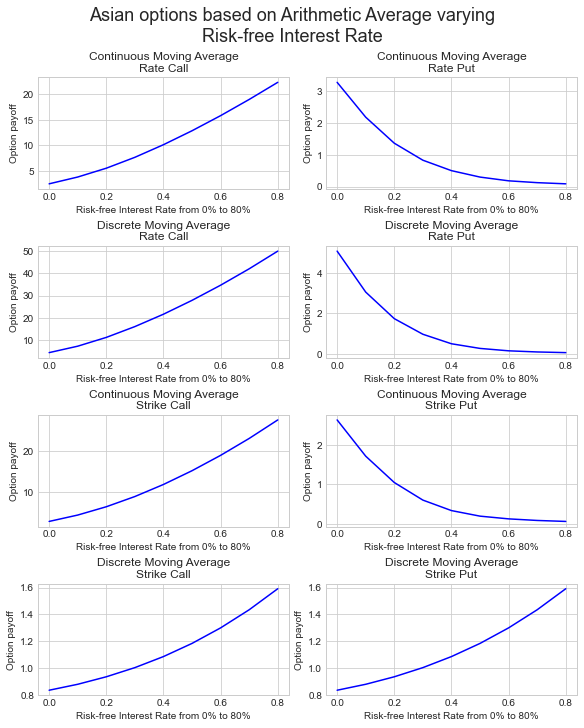

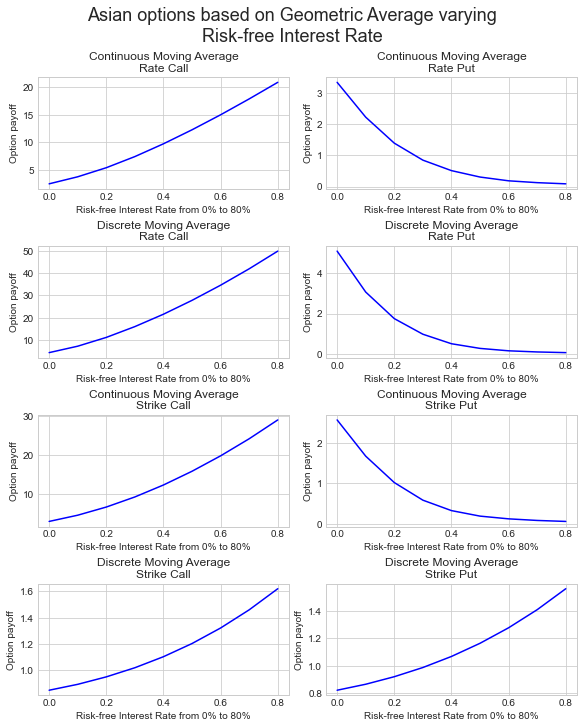

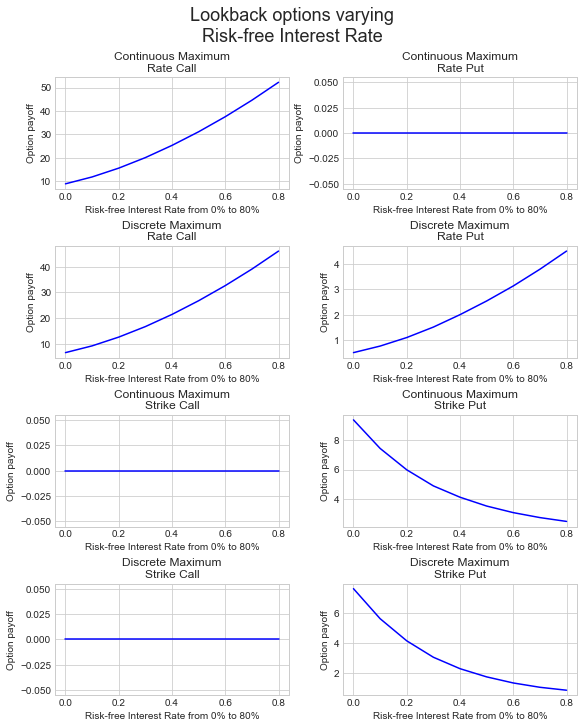

In [36]:
eo.varying_parameters(So, r, vol, T, t, sims, period, E, 'r', 0, 0.8, 0.1)

### Asian options

Both arithmetic and geometric averages has similar expected payoffs behavior with change of Risk-free Interest Rate:

- Continuous average Rate Call increases as the Risk-free Interest Rate increase.
- Discrete average Rate Call increases as the Risk-free Interest Rate increase.
- Continuous average Strike Call increases as the Risk-free Interest Rate increase.
- Discrete average Strike Call increases as the Risk-free Interest Rate increase.
- Continuous average Rate Put decreases as the Risk-free Interest Rate increase.
- Discrete average Rate Put decreases as the Risk-free Interest Rate increase.
- Continuous average Strike Put decreases as the Risk-free Interest Rate increase.
- Discrete average Strike Put increases as the Risk-free Interest Rate increase.

### Lookback options

Risk-free Interest Rate doesn't have affect on the option value (to this standard parameters) on Continuous Maximum Rate Put, Continuous Maximum Strike Call and Discrete Maximum Strike Call because of the Strike value chosen for the standard data. All these options has null expected payoffs.

- Continuous Maximum Rate Call expected payoff increases as the Risk-free Interest Rate increase.
- Discrete Maximum Rate Call expected payoff increases as the Risk-free Interest Rate increase.
- Continuous Maximum Strike Put expected payoff decreases as the Risk-free Interest Rate increase.
- Discrete Maximum Strike Put expected payoff decreases as the Risk-free Interest Rate increase.

## Time to Expiry

The Time to Expiry will be changed from 0 to 5 years, using 20 days (0.13 years) as step.

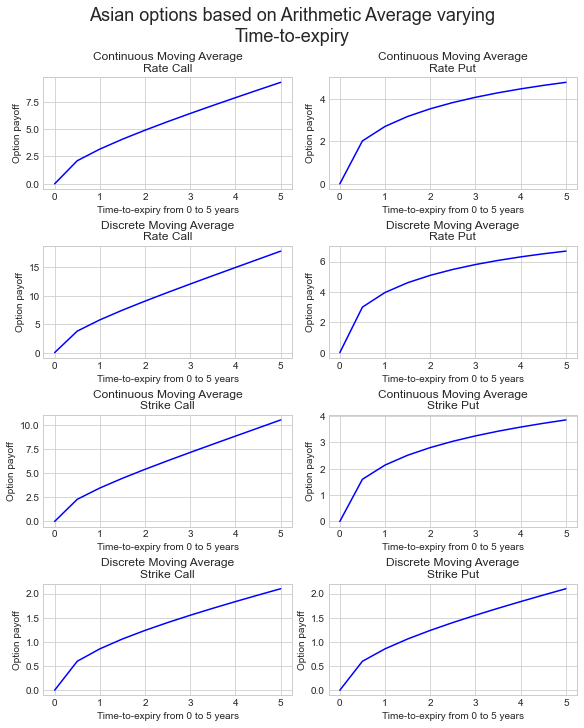

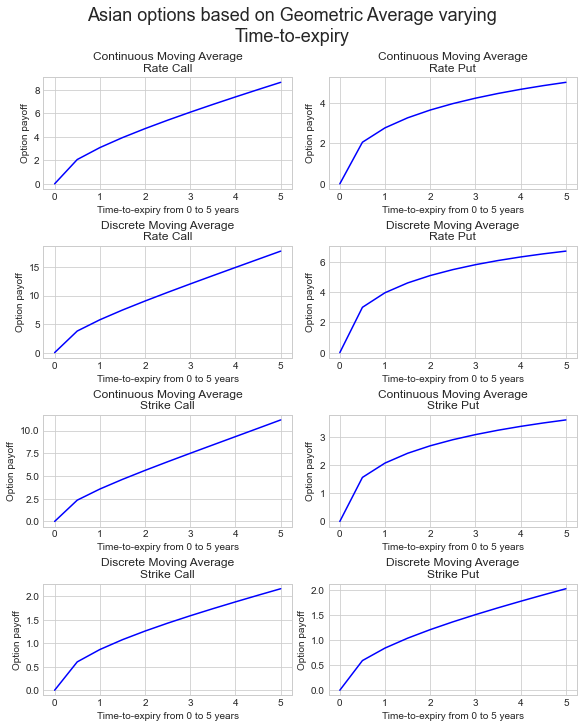

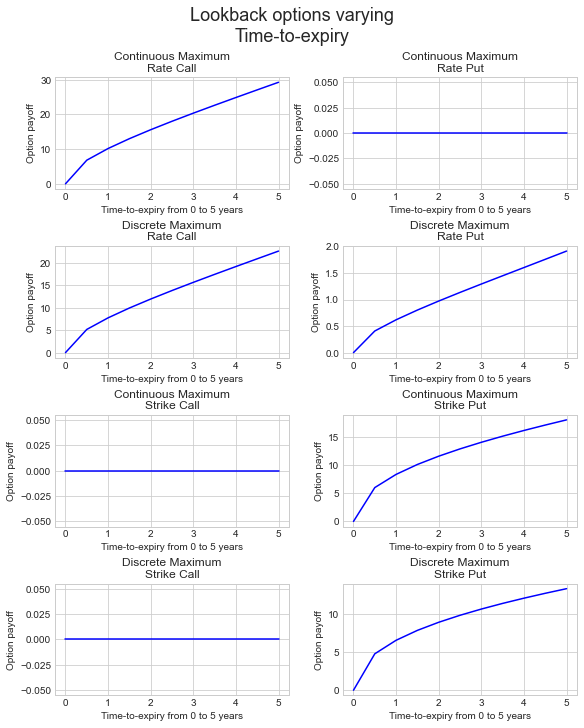

In [37]:
eo.varying_parameters(So, r, vol, T, t, sims, period, E, 'T', 0, 5, 0.5)

As expected, the time to expiry value increases the expected payoff to all cases. It was not present at Continuous Maximum Rate Put, Continuous Maximum Strike Call and Discrete Maximum Strike Call because of the Strike value chosen for the standard data.
The increase can be expained as the affect of all the parameters in so much time to receive the option payoff.

## References

- CQF Program | Python Primers
- CQF Program | Module 3 - Lecture 4: Intro to Numerical Methods.
- CQF Program | Module 3 - Lecture 5: Exotic Options.
- CQF Program | Python Lab: Monte Carlo Simulation.
- CQF Program | Python Lab: Finite Difference Methods.
- CQF Program | Tutorial: Numerical Methods & Further Topics in Monte Carlo.
- Wilmott, Paul. Paul Wilmott on Quantitative Finance. New York: John Wiley & Sons, Ltd., 2006.
- Pandas documentation: https://pandas.pydata.org/docs/.